# Linear Regression

First, we will start with a simple linear regression.

Linear Regression is an approach for modeling the relationship between a scalar dependent variable y and one or more explanatory variables(=independent variables) denoted X.

The case of one explanatory variable is called simple linear regression.

For more than one explanatory variable, the process is called multiple linear regression.

See more explanations here : https://en.wikipedia.org/wiki/Linear_regression

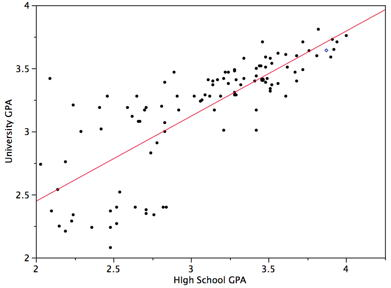

In [3]:
itorch.image('./LinearRegression/gpa.jpg')

Above is an example of linear regression.

As you can see, this simple model shows you that there is an 

adequate amount of positive relativeness between High School GPA and

University GPA.

This is a data of Cricket Chirps vs. Temperature.

| Cricket Chirps (X) | Temperature (Y) |
|:------------------:|:---------------:|
|        20          |	 88.59999847   |
|        16          | 	 71.59999847   |
|        19.79999924 |	 93.30000305   |
|        18.39999962 |	 84.30000305   |
|        17.10000038 |	 80.59999847   |
|        15.5	     |   75.19999695   |
|        14.69999981 |	 69.69999695   |
|        17.10000038 |	 82            |
|        15.39999962 | 	 69.40000153   |
|        16.20000076 |	 83.30000305   |
|        15	         |   79.59999847   |
|        17.20000076 |	 82.59999847   |
|        14.4        |   76.3          |


In [44]:
Plot = require 'itorch.Plot'

X = torch.Tensor{20, 16, 19.8, 18.4, 17.1, 15.5, 14.7, 17.1, 15.4, 16.2, 15, 17.2, 14.4}
Y = torch.Tensor{88.6, 71.6, 93.3, 84.3, 80.6, 75.2, 69.7, 82, 69.4, 83.3, 79.6, 82.6, 76.3}

plot = Plot():circle(X, Y, 'red', '(X,Y)'):draw()
plot:xaxis('Number of Circket Chirps'):yaxis('Temperature'):redraw()
plot:title('Training data')
plot:legend(true)
plot:redraw()

The data we want to predict will be

| Cricket Chirps (X) | Temperature (Y) |
|:------------------:|:---------------:|
| 16                 | 80.6            |
| 17                 | 83.5            |

In [45]:
test_X = torch.Tensor{16, 17}
test_Y = torch.Tensor{80.6, 83.5}

plot = Plot():circle(X, Y, 'red', '(X,Y)'):draw()
plot:circle(test_X, test_Y, 'blue', '(testX, testY)'):redraw()
plot:xaxis('Number of Circket Chirps'):yaxis('Temperature'):redraw()
plot:legend(true)
plot:title('Chirps vs Temperature')
plot:redraw()

## Parameters

Now, let's define a model. The Linear model will have 1 inputs and 1 outputs.

As it will be a linear regression, there will be 2 parameters(weight, bias) to learn.

In [46]:
require 'torch'
require 'optim'
require 'nn'

model = nn.Sequential()
num_inputs = 1
num_result = 1
model:add(nn.Linear(num_inputs, num_result))
criterion = nn.MSECriterion() -- Criterions to train neural networks.

x, dl_dx = model:getParameters()

feval = function(x_new)
    if x ~= x_new then
        x:copy(x_new)
    end
    
    _nidx_ = (_nidx_ or 0) + 1
    if _nidx_ > (#X)[1] then _nidx_ = 1 end
    
    -- This is important! 
    -- You need to pass the input as a 'Tensor', not as a value!
    local target = torch.Tensor{Y[_nidx_]}
    local inputs = torch.Tensor{X[_nidx_]}
    
    -- reset gradients (gradients are always accumulated, to accommodate 
    -- batch methods)
    dl_dx:zero()
    
    -- evaluate the loss function and its derivative wrt x, for that sample
    local loss_x = criterion:forward(model:forward(inputs), target)
    model:backward(inputs, criterion:backward(model.output, target))
    
    -- return loss(x) and dloss/dx
    return loss_x, dl_dx
end

## Define SGD parameters

There are 4 parameters to basically define.

The first one will be the learning rate, which will decide how large a step you will take when conducting Gradient Descent Optimization.

The next one will be the learningRate decay, which will gradually decrease the learning rate over each steps.

The third one will be the weight decay, which is well known as L2 normalization.

The last one will be the momentum, for as in SGD, the momentum can accelerate the learning process.

In this example, we will only focus on the learning rate.

In [47]:
sgd_params = {
   learningRate = 1e-3,
   learningRateDecay = 1e-4,
   weightDecay = 0,
   momentum = 0
}

In [50]:
epochs = 1e4

print('\n==========================================')
print('Training with SGD...')
print('==========================================\n')

for i = 1,epochs do
    
    loss = 0
    
    -- an epoch is a full loop over the training data
    for i = 1,(#X)[1] do
        _,fs = optim.sgd(feval,x,sgd_params)
        loss = loss + fs[1]
    end
    
    -- report loss every epoch
    loss = loss / (#X)[1]
    if(i%100 == 0) then
        print('Epoch #' .. i .. ' loss = ' .. loss)
    end
end


Training with SGD...	
	


Epoch #100 loss = 15.229771469363	


Epoch #200 loss = 15.225326567709	


Epoch #300 loss = 15.220916594877	


Epoch #400 loss = 15.216541103323	


Epoch #500 loss = 15.212199653393	


Epoch #600 loss = 15.207891813143	


Epoch #700 loss = 15.203617158172	


Epoch #800 loss = 15.19937527145	


Epoch #900 loss = 15.19516574316	


Epoch #1000 loss = 15.190988170539	


Epoch #1100 loss = 15.186842157721	


Epoch #1200 loss = 15.182727315591	


Epoch #1300 loss = 15.178643261636	


Epoch #1400 loss = 15.174589619808	


Epoch #1500 loss = 15.170566020377	


Epoch #1600 loss = 15.166572099806	


Epoch #1700 loss = 15.162607500612	


Epoch #1800 loss = 15.158671871242	


Epoch #1900 loss = 15.154764865947	


Epoch #2000 loss = 15.15088614466	


Epoch #2100 loss = 15.147035372879	


Epoch #2200 loss = 15.14321222155	


Epoch #2300 loss = 15.139416366956	


Epoch #2400 loss = 15.135647490606	


Epoch #2500 loss = 15.131905279127	


Epoch #2600 loss = 15.128189424163	


Epoch #2700 loss = 15.124499622269	


Epoch #2800 loss = 15.120835574815	


Epoch #2900 loss = 15.117196987887	


Epoch #3000 loss = 15.113583572194	


Epoch #3100 loss = 15.109995042975	


Epoch #3200 loss = 15.106431119908	


Epoch #3300 loss = 15.102891527023	


Epoch #3400 loss = 15.099375992619	


Epoch #3500 loss = 15.095884249174	


Epoch #3600 loss = 15.092416033268	


Epoch #3700 loss = 15.088971085504	


Epoch #3800 loss = 15.085549150427	


Epoch #3900 loss = 15.082149976447	


Epoch #4000 loss = 15.07877331577	


Epoch #4100 loss = 15.07541892432	


Epoch #4200 loss = 15.072086561671	


Epoch #4300 loss = 15.068775990976	


Epoch #4400 loss = 15.065486978902	


Epoch #4500 loss = 15.062219295561	


Epoch #4600 loss = 15.058972714446	


Epoch #4700 loss = 15.055747012369	


Epoch #4800 loss = 15.052541969399	


Epoch #4900 loss = 15.049357368799	


Epoch #5000 loss = 15.046192996973	


Epoch #5100 loss = 15.0430486434	


Epoch #5200 loss = 15.039924100586	


Epoch #5300 loss = 15.036819164002	


Epoch #5400 loss = 15.033733632036	


Epoch #5500 loss = 15.030667305934	


Epoch #5600 loss = 15.027619989754	


Epoch #5700 loss = 15.024591490313	


Epoch #5800 loss = 15.021581617136	


Epoch #5900 loss = 15.018590182412	


Epoch #6000 loss = 15.015617000943	


Epoch #6100 loss = 15.012661890098	


Epoch #6200 loss = 15.009724669772	


Epoch #6300 loss = 15.006805162335	


Epoch #6400 loss = 15.003903192594	


Epoch #6500 loss = 15.001018587748	


Epoch #6600 loss = 14.998151177348	


Epoch #6700 loss = 14.995300793255	


Epoch #6800 loss = 14.992467269601	


Epoch #6900 loss = 14.989650442748	


Epoch #7000 loss = 14.986850151255	


Epoch #7100 loss = 14.984066235833	


Epoch #7200 loss = 14.981298539316	


Epoch #7300 loss = 14.97854690662	


Epoch #7400 loss = 14.97581118471	


Epoch #7500 loss = 14.973091222565	


Epoch #7600 loss = 14.970386871145	


Epoch #7700 loss = 14.967697983356	


Epoch #7800 loss = 14.965024414021	


Epoch #7900 loss = 14.962366019845	


Epoch #8000 loss = 14.959722659386	


Epoch #8100 loss = 14.957094193023	


Epoch #8200 loss = 14.954480482929	


Epoch #8300 loss = 14.951881393036	


Epoch #8400 loss = 14.949296789014	


Epoch #8500 loss = 14.946726538237	


Epoch #8600 loss = 14.944170509757	


Epoch #8700 loss = 14.94162857428	


Epoch #8800 loss = 14.939100604133	


Epoch #8900 loss = 14.936586473244	


Epoch #9000 loss = 14.934086057116	


Epoch #9100 loss = 14.931599232798	


Epoch #9200 loss = 14.929125878864	


Epoch #9300 loss = 14.926665875386	


Epoch #9400 loss = 14.924219103917	


Epoch #9500 loss = 14.921785447458	


Epoch #9600 loss = 14.919364790444	


Epoch #9700 loss = 14.916957018716	


Epoch #9800 loss = 14.914562019504	


Epoch #9900 loss = 14.9121796814	


Epoch #10000 loss = 14.909809894343	


In [53]:
text = {80.6, 83.5}

for i= 1,(#test_X)[1] do
    test_input = torch.Tensor{test_X[i]}
    local myPrediction = model:forward(test_input)
    print(string.format("%2d  Pred:%6.2f Label:%6.2f", i, myPrediction[1], text[i]))
end

 1  Pred: 76.96 Label: 80.60	
 2  Pred: 80.90 Label: 83.50	
